In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?',
    'Time Encoding',
    'Approx Error "Size" (for figures only)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

# drop nan time encoding
approximation_algorithms = approximation_algorithms[approximation_algorithms['Time Encoding'].notnull()]


# remove question marks from time encoding
approximation_algorithms['Time Encoding'] = approximation_algorithms['Time Encoding'].str.replace('?', '')
approximation_algorithms['Time Encoding'].value_counts()



Time Encoding
10        74
20        45
11        26
400       25
21        19
30        15
16         9
16.24      8
15         7
25         7
25.02      6
15.015     6
15.41      3
16.1       3
12.1       2
40         2
31         2
26.5       2
6          2
12         1
5          1
25.5       1
13         1
1010       1
1          1
26.65      1
600        1
60         1
500        1
16.5       1
22         1
16.2       1
15.25      1
15.019     1
16.4       1
1045       1
6.6        1
6.1        1
25.51      1
25.2       1
26.55      1
21.5       1
25.3       1
15.097     1
15.26      1
27         1
41         1
Name: count, dtype: int64

In [43]:
# read sheet1
# Load the dataset
columns = [
    'Family Name',
    'Variation',
    'Algorithm Name',
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?',
    'Time Encoding',

]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']


# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(
    r'(\d+\.?\d*)')[0].astype(float)


sheet1['Approx Error "Size" (for figures only)'] = '0'

# drop if Famiy Name is not in approximation_algorithms
sheet1 = sheet1[sheet1['Family Name'].isin(
    approximation_algorithms['Family Name'])]

# drop NaN time encoding
sheet1 = sheet1[sheet1['Time Encoding'].notnull()]

sheet1['Time Encoding'].value_counts()


Time Encoding
20         39
11         31
16         19
10         10
986         7
30          6
1000        6
1045        5
10.1        4
15.25       3
1010        3
2000        2
21          2
16.1        2
12          2
15.109      2
15.992      1
15.097      1
15.614      1
15.41       1
11.585      1
9000        1
1984        1
960         1
15.92       1
11.1        1
1020        1
988.1       1
944         1
9122        1
40          1
52          1
28.5        1
988.2       1
15.105      1
11.3        1
1515        1
942         1
26.5        1
16.2        1
15.5        1
15.47       1
15.26       1
15.24       1
15.23       1
15.107      1
15.103      1
15.101      1
988         1
15.4        1
15.95       1
16.9        1
10.0005     1
41.1        1
Name: count, dtype: int64

In [44]:
# convert time encoding into a function name following this example: 10 -> comp_fn_10_0000 , 10.5 -> comp_fn_10_5000
def encode_time_to_function_name(time_str):
    # Split on the decimal point
    parts = time_str.split('.')
    integer_part = int(parts[0])
    decimal_part = 0
    if len(parts) > 1:
        decimal_fraction = parts[1] + "0000" 
        decimal_part = int(decimal_fraction[:4])  

    function_name = f"comp_fn_{integer_part:d}_{decimal_part:04d}"
    return function_name

sheet1['Time Encoding Function'] = sheet1['Time Encoding'].apply(encode_time_to_function_name)
approximation_algorithms['Time Encoding Function'] = approximation_algorithms['Time Encoding'].apply(encode_time_to_function_name)

In [45]:
encode_time_to_function_name('6.6')

'comp_fn_6_6000'

In [46]:
import inspect
from complexity_functions import complexity_functions

elements = inspect.getmembers(complexity_functions, inspect.isfunction)
elements_dict = dict(elements)

# check if all time encoding functions are in the complexity_functions module
for time_encoding in sheet1['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(sheet1[sheet1['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


for time_encoding in approximation_algorithms['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(approximation_algorithms[approximation_algorithms['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


In [47]:
sheet1['n = 10^3'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
sheet1['n = 10^6'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
sheet1['n = 10^9'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))

approximation_algorithms['n = 10^3'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
approximation_algorithms['n = 10^6'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
approximation_algorithms['n = 10^9'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))



In [48]:
# list families that are in both datasets
sheet1_families = sheet1['Family Name'].unique()
approximation_families = approximation_algorithms['Family Name'].unique()

common_families = np.intersect1d(sheet1_families, approximation_families)
len(common_families)

approximation_algorithms['Approx Error "Size" (for figures only)'].value_counts()

Approx Error "Size" (for figures only)
1.0    140
2.0     75
2.4     27
2.6     24
4.0     23
Name: count, dtype: int64

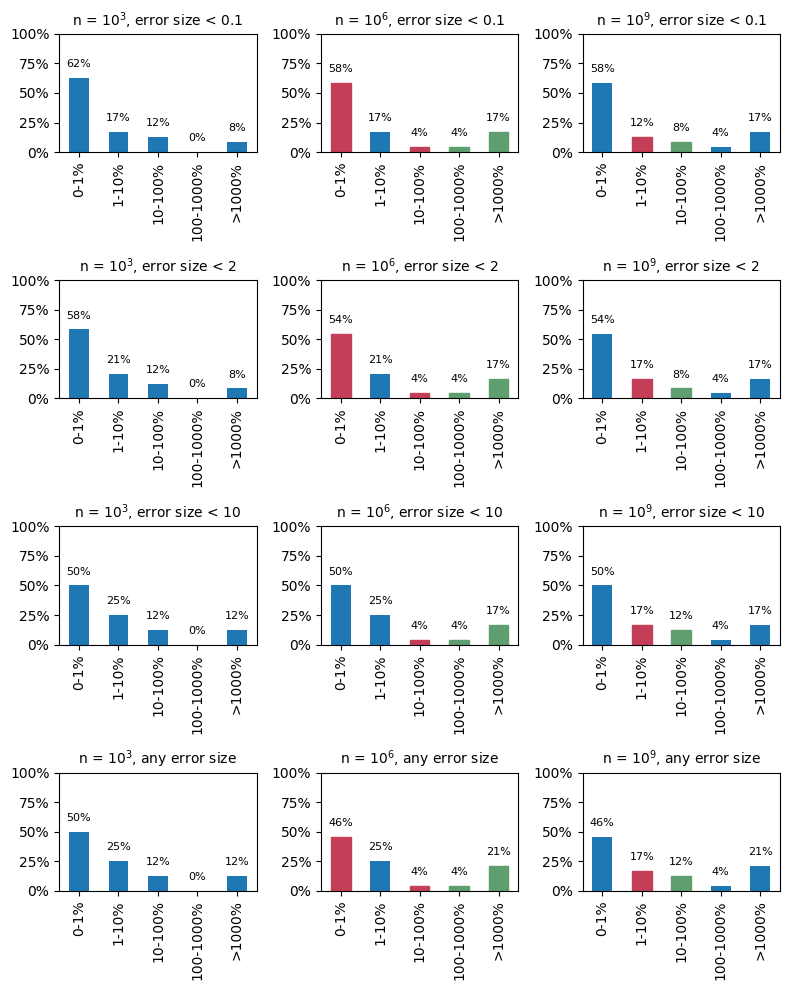

In [88]:
from complexity_functions.huge_num import Huge
CUR_YEAR = 2024
# 1 - "smaller" than 0.1
error_size_1 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'] == 1]
# 1 and 2
error_size_2 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2])]
# 1 and 2 and 2.4
error_size_2_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4])]
# 1 and 2 and 2.4 and 2.6
error_size_2_6 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6])]
# 1 and 2 and 3 and 4
error_size_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6, 3, 4])]

def process_cgr_data(error_size_df, n):
    cgr = pd.DataFrame()
    cgr['Family Name'] = common_families
    cgr['b'] = cgr['Family Name'].apply(lambda x: sheet1[sheet1['Family Name'] == x][n].min())
    cgr['f'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x][n].min(), error_size_df[error_size_df['Family Name'] == x][n].min()))
    cgr['t'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x]['Year'].min(), error_size_df[error_size_df['Family Name'] == x]['Year'].min()))
    cgr['cgr'] = cgr.apply(lambda x: (x['f']/x['b'])**(1/(CUR_YEAR-x['t']))-1 if x['f'] >= x['b'] else (x['b']/x['f'])**(1/(CUR_YEAR-x['t']))-1, axis=1)
    cgr['cgr_percentage_group'] = pd.cut(cgr['cgr'], bins=[-1, 0.01, 0.1, 1, 10, float("inf")], right=True, include_lowest=True, labels=['0-1%', '1-10%', '10-100%', '100-1000%','>1000%'])
    return cgr
                            
cgr_n_3_e_1 = process_cgr_data(error_size_1, 'n = 10^3')
cgr_n_6_e_1 = process_cgr_data(error_size_1, 'n = 10^6')
cgr_n_9_e_1 = process_cgr_data(error_size_1, 'n = 10^9')

cgr_n_3_e_2 = process_cgr_data(error_size_2, 'n = 10^3')
cgr_n_6_e_2 = process_cgr_data(error_size_2, 'n = 10^6')
cgr_n_9_e_2 = process_cgr_data(error_size_2, 'n = 10^9')

cgr_n_3_e_2_6 = process_cgr_data(error_size_2_6, 'n = 10^3')
cgr_n_6_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^6')
cgr_n_9_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^9')

cgr_n_3_e_4 = process_cgr_data(error_size_4, 'n = 10^3')
cgr_n_6_e_4 = process_cgr_data(error_size_4, 'n = 10^6')
cgr_n_9_e_4 = process_cgr_data(error_size_4, 'n = 10^9')

# plot 3 figures
fig, axs = plt.subplots(4, 3, figsize=(8,10))

# 1 - "smaller" than 0.1
cgr_n_3_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 0], title='n = $10^{3}$, error size < 0.1')
cgr_n_6_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 1], title='n = $10^{6}$, error size < 0.1')
cgr_n_9_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 2], title='n = $10^{9}$, error size < 0.1')

# 1 and 2
cgr_n_3_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 0], title='n = $10^{3}$, error size < 2')
cgr_n_6_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 1], title='n = $10^{6}$, error size < 2')
cgr_n_9_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 2], title='n = $10^{9}$, error size < 2')

# 1 and 2 and 2.4
cgr_n_3_e_2_6['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 0], title='n = $10^{3}$, error size < 10')
cgr_n_6_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 1], title='n = $10^{6}$, error size < 10')
cgr_n_9_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 2], title='n = $10^{9}$, error size < 10')

# 1 and 2 and 3 and 4
cgr_n_3_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 0], title='n = $10^{3}$, any error size')
cgr_n_6_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 1], title='n = $10^{6}$, any error size')
cgr_n_9_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 2], title='n = $10^{9}$, any error size')



# y-axis label from 0 to 100%
for ax in axs.flat:
    # font size title
    ax.title.set_size(10)

    ax.set(ylabel='', xlabel='')
    ax.set_ylim(0, 1)
    # format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    


# if the value decreases, set the color to red
for  index,ax in enumerate(axs.flat):
    for pindex, p in enumerate(ax.patches):
        if index % 3 == 0:
            continue
        if axs.flat[index-1].patches[pindex].get_height() > p.get_height():
            p.set_color('#C33E56')
        elif axs.flat[index-1].patches[pindex].get_height() < p.get_height():
            p.set_color('#5F9E6E')
   

    
# for  index,ax in enumerate(axs.flat):
#     for pindex, p in enumerate(ax.patches):
#         if index % 3 == 0:
#             ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

#             continue
#         diff= axs.flat[index-1].patches[pindex].get_height() - p.get_height()
#         if diff > 0:
#             ax.annotate(f'-{diff:.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='r')
#             ax.annotate(fr'$\downarrow$', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=8, color='r')

#         elif diff < 0:
#             ax.annotate(f'+{abs(diff):.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='g')
#             ax.annotate(fr'$\uparrow$', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=8, color='g')

    








# add value on top of each bar
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# add margin between subplots
plt.tight_layout()
plt.show()



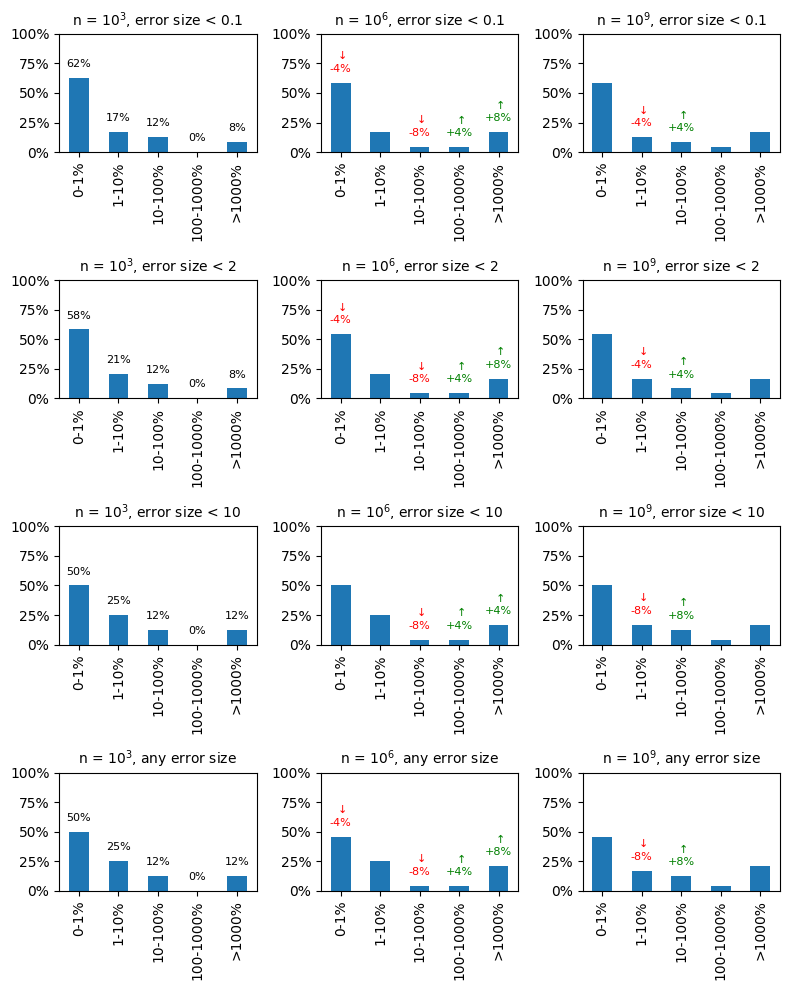

In [86]:
from complexity_functions.huge_num import Huge
CUR_YEAR = 2024
# 1 - "smaller" than 0.1
error_size_1 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'] == 1]
# 1 and 2
error_size_2 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2])]
# 1 and 2 and 2.4
error_size_2_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4])]
# 1 and 2 and 2.4 and 2.6
error_size_2_6 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6])]
# 1 and 2 and 3 and 4
error_size_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6, 3, 4])]

def process_cgr_data(error_size_df, n):
    cgr = pd.DataFrame()
    cgr['Family Name'] = common_families
    cgr['b'] = cgr['Family Name'].apply(lambda x: sheet1[sheet1['Family Name'] == x][n].min())
    cgr['f'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x][n].min(), error_size_df[error_size_df['Family Name'] == x][n].min()))
    cgr['t'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x]['Year'].min(), error_size_df[error_size_df['Family Name'] == x]['Year'].min()))
    cgr['cgr'] = cgr.apply(lambda x: (x['f']/x['b'])**(1/(CUR_YEAR-x['t']))-1 if x['f'] >= x['b'] else (x['b']/x['f'])**(1/(CUR_YEAR-x['t']))-1, axis=1)
    cgr['cgr_percentage_group'] = pd.cut(cgr['cgr'], bins=[-1, 0.01, 0.1, 1, 10, float("inf")], right=True, include_lowest=True, labels=['0-1%', '1-10%', '10-100%', '100-1000%','>1000%'])
    return cgr
                            
cgr_n_3_e_1 = process_cgr_data(error_size_1, 'n = 10^3')
cgr_n_6_e_1 = process_cgr_data(error_size_1, 'n = 10^6')
cgr_n_9_e_1 = process_cgr_data(error_size_1, 'n = 10^9')

cgr_n_3_e_2 = process_cgr_data(error_size_2, 'n = 10^3')
cgr_n_6_e_2 = process_cgr_data(error_size_2, 'n = 10^6')
cgr_n_9_e_2 = process_cgr_data(error_size_2, 'n = 10^9')

cgr_n_3_e_2_6 = process_cgr_data(error_size_2_6, 'n = 10^3')
cgr_n_6_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^6')
cgr_n_9_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^9')

cgr_n_3_e_4 = process_cgr_data(error_size_4, 'n = 10^3')
cgr_n_6_e_4 = process_cgr_data(error_size_4, 'n = 10^6')
cgr_n_9_e_4 = process_cgr_data(error_size_4, 'n = 10^9')

# plot 3 figures
fig, axs = plt.subplots(4, 3, figsize=(8,10))

# 1 - "smaller" than 0.1
cgr_n_3_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 0], title='n = $10^{3}$, error size < 0.1')
cgr_n_6_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 1], title='n = $10^{6}$, error size < 0.1')
cgr_n_9_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 2], title='n = $10^{9}$, error size < 0.1')

# 1 and 2
cgr_n_3_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 0], title='n = $10^{3}$, error size < 2')
cgr_n_6_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 1], title='n = $10^{6}$, error size < 2')
cgr_n_9_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 2], title='n = $10^{9}$, error size < 2')

# 1 and 2 and 2.4
cgr_n_3_e_2_6['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 0], title='n = $10^{3}$, error size < 10')
cgr_n_6_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 1], title='n = $10^{6}$, error size < 10')
cgr_n_9_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 2], title='n = $10^{9}$, error size < 10')

# 1 and 2 and 3 and 4
cgr_n_3_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 0], title='n = $10^{3}$, any error size')
cgr_n_6_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 1], title='n = $10^{6}$, any error size')
cgr_n_9_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 2], title='n = $10^{9}$, any error size')



# y-axis label from 0 to 100%
for ax in axs.flat:
    # font size title
    ax.title.set_size(10)

    ax.set(ylabel='', xlabel='')
    ax.set_ylim(0, 1)
    # format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    


# if the value decreases, set the color to red
for  index,ax in enumerate(axs.flat):
    for pindex, p in enumerate(ax.patches):
        if index % 3 == 0:
            ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

            continue
        diff= axs.flat[index-1].patches[pindex].get_height() - p.get_height()
        if diff > 0:
            ax.annotate(f'-{diff:.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='r')
            ax.annotate(fr'$\downarrow$', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=8, color='r')

        elif diff < 0:
            ax.annotate(f'+{abs(diff):.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='g')
            ax.annotate(fr'$\uparrow$', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=8, color='g')

    









# add margin between subplots
plt.tight_layout()
plt.show()

